In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
# df = pd.read_csv('data/2020 Line 280 AVL report.csv')
df = pd.read_csv('data/2019 Line 280 AVL allscripts.csv')
df['Actual Depart Hour'] = df['Actual Depart'].str.split(':',expand=True)[0]

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

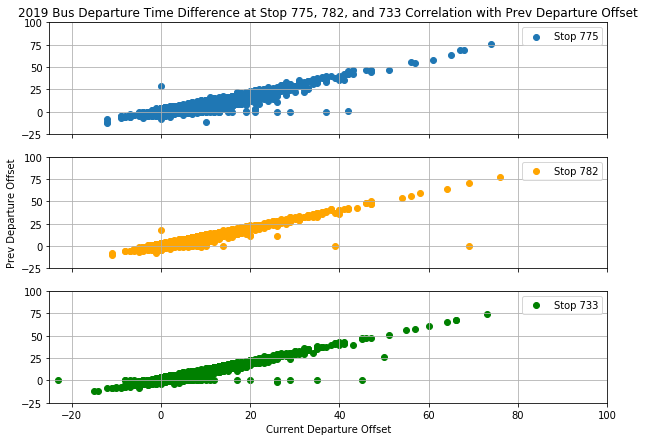

In [8]:
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set_xlim(left = -25,right=100)
ax1.set_ylim(bottom=-25,top=100)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Prev Departure Offset")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax3.set(xlabel="Current Departure Offset")
ax2.set(ylabel="Prev Departure Offset")

locs, labels = plt.xticks() 



plt.show()

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

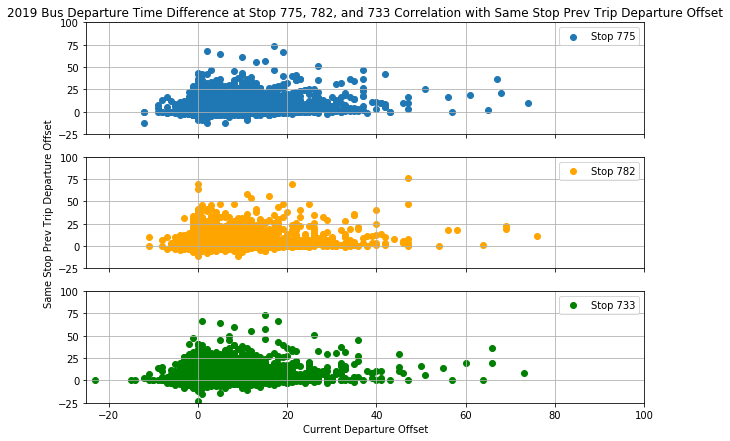

In [9]:
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Same Stop Prev Trip Departure Offset'] = stopactual['Same Stop Prev Trip Departure Offset'].astype(int)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set_xlim(left = -25,right=100)
ax1.set_ylim(bottom=-25,top=100)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Same Stop Prev Trip Departure Offset")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Same Stop Prev Trip Departure Offset'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Same Stop Prev Trip Departure Offset'] = stopactual['Same Stop Prev Trip Departure Offset'].astype(int)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Same Stop Prev Trip Departure Offset'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Same Stop Prev Trip Departure Offset'] = stopactual['Same Stop Prev Trip Departure Offset'].astype(int)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Same Stop Prev Trip Departure Offset'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax3.set(xlabel="Current Departure Offset")
ax2.set(ylabel="Same Stop Prev Trip Departure Offset")

locs, labels = plt.xticks() 



plt.show()

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

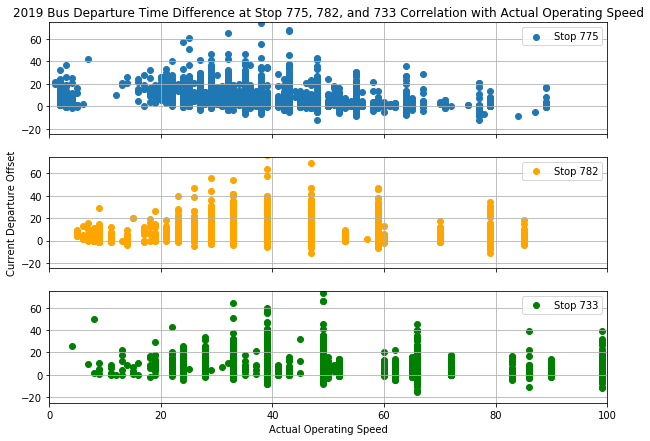

In [10]:
df['Actual Operating Speed'] = df['Actual Operating Speed'].fillna(0).astype(int)
df = df.loc[df['Actual Operating Speed'] != 0]
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Actual Operating Speed'] = stopactual['Actual Operating Speed'].astype(float)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set_xlim(left = 0,right=100)
ax1.set_ylim(bottom=-25,top=75)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Actual Operating Speed")
# plt.ylim(0,15)
ax1.scatter(stopactual['Actual Operating Speed'], stopactual['Difference (Minutes)'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Actual Operating Speed'] = stopactual['Actual Operating Speed'].astype(float)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Actual Operating Speed'], stopactual['Difference (Minutes)'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Actual Operating Speed'] = stopactual['Actual Operating Speed'].astype(float)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Actual Operating Speed'], stopactual['Difference (Minutes)'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax2.set(ylabel="Current Departure Offset")
ax3.set(xlabel="Actual Operating Speed")

locs, labels = plt.xticks() 



plt.show()

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

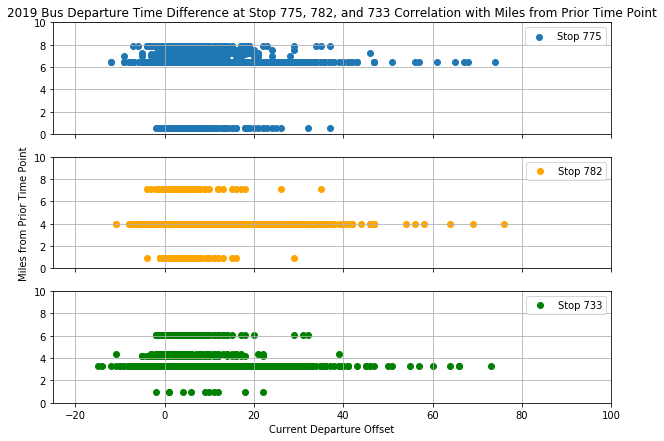

In [11]:
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Miles from Prior Time Point'] = stopactual['Miles from Prior Time Point'].astype(float)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set_xlim(left = -25,right=100)
ax1.set_ylim(bottom=0,top=10)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Miles from Prior Time Point")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Miles from Prior Time Point'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Miles from Prior Time Point'] = stopactual['Miles from Prior Time Point'].astype(float)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Miles from Prior Time Point'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Miles from Prior Time Point'] = stopactual['Miles from Prior Time Point'].astype(float)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Miles from Prior Time Point'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax3.set(xlabel="Current Departure Offset")
ax2.set(ylabel="Miles from Prior Time Point")

locs, labels = plt.xticks() 



plt.show()

4         1
5         3
7         2
8         2
10        4
         ..
202607    3
202609    4
202610    2
202611    2
202612    1
Name: Dwell Time, Length: 93220, dtype: int32
4         1.000000
5         0.333333
7         0.500000
8         0.500000
10        0.250000
            ...   
202607    0.333333
202609    0.250000
202610    0.500000
202611    0.500000
202612    1.000000
Name: Inverse Dwell Time, Length: 93220, dtype: float64


C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

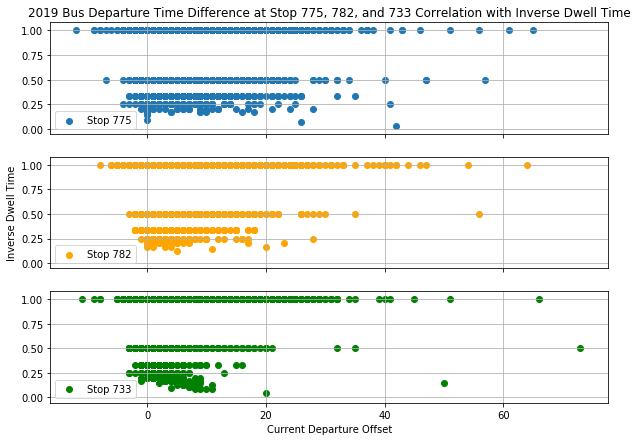

In [12]:
df['Dwell Time'] = df['Dwell Time'].fillna(0).astype(int)
df = df.loc[df['Dwell Time'] != 0]
print(df['Dwell Time'])
df['Inverse Dwell Time'] = 1/df['Dwell Time']
print(df['Inverse Dwell Time'])
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Inverse Dwell Time'] = stopactual['Inverse Dwell Time'].astype(float)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Inverse Dwell Time")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Inverse Dwell Time'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Inverse Dwell Time'] = stopactual['Inverse Dwell Time'].astype(float)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Inverse Dwell Time'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Inverse Dwell Time'] = stopactual['Inverse Dwell Time'].astype(float)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Inverse Dwell Time'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax3.set(xlabel="Current Departure Offset")
ax2.set(ylabel="Inverse Dwell Time")

locs, labels = plt.xticks() 



plt.show()

In [13]:

# df1 = pd.get_dummies(df, columns=['Day of Week'],prefix=['Enc_'])
df1 = df.loc[(df['Bus Stop ID'] == 775) | (df['Bus Stop ID'] == 782) | (df['Bus Stop ID'] == 733)]
# df1['Transit Date Month'] = df1['Transit Date'].str.split('/',expand=True)[0]
df1.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')
df1['Actual Depart Hour'] = df['Actual Depart'].str.split(':',expand=True)[0]

df1['Difference (Minutes)'] = df1['Difference (Minutes)'].astype(int)
df1['Prev Departure Offset'] = df1['Prev Departure Offset'].astype(int)
# df1['Transit Date Month'] = df1['Transit Date Month'].astype(int)

# df.replace('?', -99999, inplace=True) #sees -99999 as outlier, ignores it
df1.drop(['Bus Stop ID','Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction','Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart','Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers','Dwell Time', 'Actual Run Time', 'Scheduled Operating Speed','Actual Operating Speed','Run Time Variance','Day Type','Time Period', 'Scheduled Run Time','Miles from Prior Time Point', 'Day of Week', 'Actual Depart Hour', 'Inverse Dwell Time', 'Scheduled Depart DateTime', 'Actual Depart DateTime', 'Same Stop Prev Trip Departure Offset'], 1, inplace=True)
print(df1.head)
# pd.to_numeric(df1['Actual Operating Speed'], errors='coerce')
X = np.array(df1.drop(['Difference (Minutes)'],1)) #using everything except class to train
Y = np.array(df1['Difference (Minutes)']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

clf = svm.SVR()
clf.fit(X_train, Y_train)

scores = cross_val_score(clf, X_test, Y_test, cv=5)

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4), sharey=True)
# ax.plot(X_train, clf.fit(X_train, Y_train).predict(X_train), lw=2)
# ax.scatter(X_train[clf.support_], Y_train[clf.support_], facecolor="none",s=50)
# # ax.scatter(X_test[np.setdiff1d(np.arange(len(X_test)),clf.support_)],
# #            Y_test[np.setdiff1d(np.arange(len(X_test)), clf.support_)],
# #            facecolor="none", edgecolor="k", s=50)


# fig.text(0.5, 0.04, 'data', ha='center', va='center')
# fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
# fig.suptitle("Support Vector Regression", fontsize=14)
# plt.show()

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

<bound method NDFrame.head of         Difference (Minutes)  Prev Departure Offset
4                          1                      1
13                         4                      4
26                         1                      2
41                         8                      8
42                         8                      8
...                      ...                    ...
202579                     4                      6
202588                     0                      1
202607                     0                      0
202609                     0                      0
202611                     0                      0

[25527 rows x 2 columns]>


C:\Users\Jai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jai\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

[0.78583543 0.77458928 0.69853829 0.78586172 0.81104873]
0.77 accuracy with a standard deviation of 0.04
